# Distortion Comparison before and after undistortion
### The steps to segment an image based on colour and then further compare the fitted ellipses before and after distortion

## Segment images based on colour

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
%matplotlib inline

In [2]:
#Img before undistortion
distBall = cv2.imread('./Test_Frames/img00570.jpg')
distBall = cv2.cvtColor(distBall,cv2.COLOR_BGR2RGB) #BGR to RGB, so plots correct colour
hsv_distBall = cv2.cvtColor(distBall,cv2.COLOR_RGB2HSV) #img to HSV

#Img after undistortion
undistBall = cv2.imread('./Undistorted_imgs/unImg00570.jpg')
undistBall = cv2.cvtColor(undistBall,cv2.COLOR_BGR2RGB)
hsv_undistBall = cv2.cvtColor(undistBall,cv2.COLOR_RGB2HSV)

#Predetermined HSV colour range
#lower_hsv = (0,138,80)
#upper_hsv = (8,255,255)
lower_hsv = (0,138,60)
upper_hsv = (10,255,255)

### Create masks

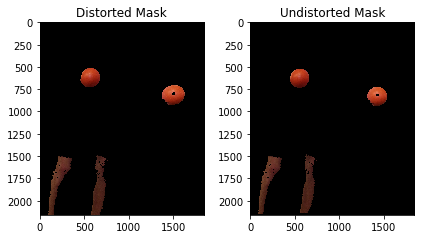

In [3]:
#Dist img mask
mask_dist = cv2.inRange(hsv_distBall,lower_hsv,upper_hsv)
mask_dist = cv2.erode(mask_dist, None, iterations=2) #Removes small blobs
mask_dist = cv2.dilate(mask_dist, None, iterations=2)
dist_res_mask = cv2.bitwise_and(distBall,distBall,mask=mask_dist)

#unDist img mask
mask_undist = cv2.inRange(hsv_undistBall,lower_hsv,upper_hsv)
mask_undist = cv2.erode(mask_undist, None, iterations=2) #Removes small blobs
mask_undist = cv2.dilate(mask_undist, None, iterations=2)
undist_res_mask = cv2.bitwise_and(undistBall,undistBall,mask=mask_undist)

fig, axes = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
plt.imshow(dist_res_mask[:,2000:])
plt.title('Distorted Mask')
plt.subplot(1,2,2)
plt.imshow(undist_res_mask[:,2000:])
plt.title('Undistorted Mask')
plt.tight_layout()
plt.show()

## Indetify contours based on colour segmentation

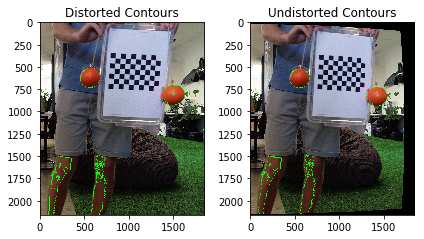

In [4]:
#Dist Contours
_, dist_contours, _ = cv2.findContours(mask_dist,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#Undist Contours
_, undist_contours, _ = cv2.findContours(mask_undist,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

##Illustrate All Contours:
fig, axes = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
plt.imshow(cv2.drawContours(distBall, dist_contours,-1,(0,255,0),3)[:,2000:])
plt.title('Distorted Contours')
plt.subplot(1,2,2)
plt.imshow(cv2.drawContours(undistBall, undist_contours,-1,(0,255,0),3)[:,2000:])
plt.title('Undistorted Contours')
plt.tight_layout()
plt.show()

### Find the area of the contours to identify those relating to the balls.

*Note*:

~This technique of identifying the contours of the balls requires revision as there is no guarentee that the balls will always be the biggest contour in the image. However, this approach works for the illustration purposes.~

To identify the ball contours initially a stricter (smaller) HSV colour range was used. The reason being, when you have a large HSV range there is more chance that unwanted regions appear in the masks and thus add possible contours. However, this also has a negative effect in that some desired region can also be omitted. 

Thus a small strict range was used to identify the possible expected 'areas' range for the balls. Once this area range was identified the HSV range could be relaxed to included more of the ball in the mask as well as other unwanted regions. However, these unwanted regions pose no further problem since we have an expected 'area' range to search for the ball's contours.

These expected 'area' ranges can be seen implemented in the lambda functions on line 4 and 12 in the code block below.

*p.s. give me a ring if this doesn't make sense and I'll try explain it a little better*

In [15]:
#Find area of dist conts, locate indicies of largest, store in new array(can be omitted)
dist_cont_areas = [(cv2.contourArea(contour), contour) for contour in dist_contours] #Find contour area and group with contour
index_dist = sorted(range(len(dist_cont_areas)),key =lambda i : 45000> dist_cont_areas[i][0]>32000)[-2:] #Find conts in area range
dist_ball_cont = [dist_cont_areas[index_dist[0]][1],dist_cont_areas[index_dist[1]][1]]
print("Areas:")
print(dist_cont_areas[index_dist[0]][0])
print(dist_cont_areas[index_dist[1]][0])

#Same for undist conts
undist_cont_areas = [(cv2.contourArea(contour), contour) for contour in undist_contours]
index_undist = sorted(range(len(undist_cont_areas)),key =lambda i : 40000>undist_cont_areas[i][0]>32000)[-2:]
undist_ball_cont = [undist_cont_areas[index_undist[0]][1],undist_cont_areas[index_undist[1]][1]]
print(undist_cont_areas[index_undist[0]][0])
print(undist_cont_areas[index_undist[1]][0])

Areas:
43910.5
37708.0
36247.5
36121.5


### Given the areas of the ball's contours, fit ellipses to them.

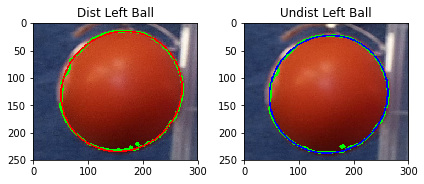

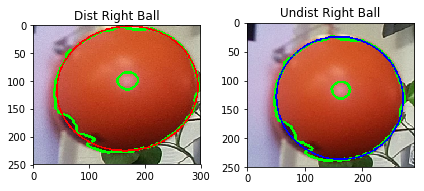

In [6]:
#Distorted Balls
left_dist_ball = cv2.fitEllipse(dist_ball_cont[1])
right_dist_ball = cv2.fitEllipse(dist_ball_cont[0])

#Undistorted Balls
left_undist_ball = cv2.fitEllipse(undist_ball_cont[1])
right_undist_ball = cv2.fitEllipse(undist_ball_cont[0])

##Illustration of contours(GREEN) and Fitted Ellipses(Blue and Red)
#Left Balls
plt.subplot(1,2,1)
plt.imshow(cv2.ellipse(distBall,left_dist_ball,(255,0,0),2)[500:750,2400:2700])
plt.title('Dist Left Ball')
plt.subplot(1,2,2)
plt.imshow(cv2.ellipse(undistBall,left_undist_ball,(0,0,255),2)[500:750,2400:2700])
plt.title('Undist Left Ball')
plt.tight_layout()
plt.show()
#Right Balls
plt.subplot(1,2,1)
plt.imshow(cv2.ellipse(distBall,right_dist_ball,(255,0,0),2)[700:950,3320:3620])
plt.title('Dist Right Ball')
plt.subplot(1,2,2)
plt.imshow(cv2.ellipse(undistBall,right_undist_ball,(0,0,255),2)[700:950,3260:3550])
plt.title('Undist Right Ball')
plt.tight_layout()
plt.show()

## Comparison of Ellipses with a Reference Circle

*Note*:

The ellipses major and minor axes have been normalized for ease of plotting, The original pixel values can be seen below in a table.

### Left Ball

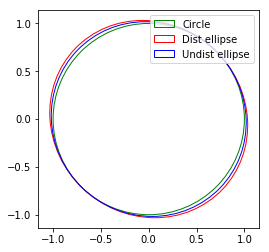

In [7]:
labels = ['Circle','Dist ellipse', 'Undist ellipse']
#Circle, R = 1 centered on the origin.
circle = plt.Circle((0,0),1,fc = 'none',ec="g")
plt.gca().add_patch(circle)


#Left Dist ball
dist_scaled_a = 2*left_dist_ball[1][0]/left_dist_ball[1][0]
dist_scaled_b = 2*left_dist_ball[1][1]/left_dist_ball[1][0]
dist_ellipse = Ellipse((0,0),dist_scaled_a,dist_scaled_b,left_dist_ball[2],edgecolor ='r',fc = 'none')
plt.gca().add_patch(dist_ellipse)
plt.axis('scaled')

undist_scaled_a = 2*left_undist_ball[1][0]/left_undist_ball[1][0]
undist_scaled_b = 2*left_undist_ball[1][1]/left_undist_ball[1][0]
undist_ellipse = Ellipse((0,0),undist_scaled_a,undist_scaled_b,left_undist_ball[2],edgecolor ='b',fc = 'none')
plt.gca().add_patch(undist_ellipse)
plt.legend(labels)

plt.show()

#### Review of information from Ellipses associated with LEFT ball

Instead of referring to the major and minor axis of the ellipse, width and height will be used.
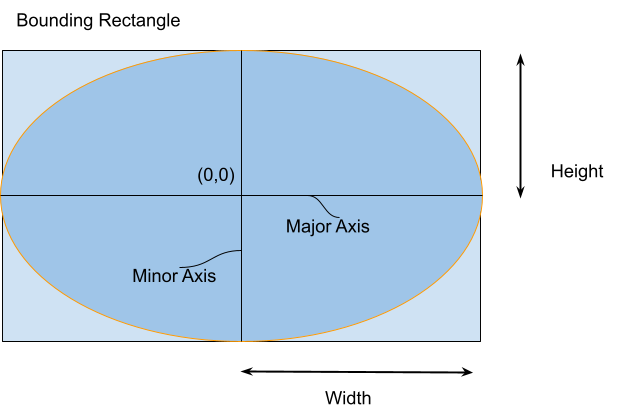
The following tables contains the widths and heights for the left ball before and after distortion. Included in the table is a correlation. This correlation is determined by $\frac{width}{height}$ and its purpose is to show how similar the ellipse is to a circle, where a circle would be represented by a value of **1**
#### Left Ball Comparsion
| | Distorted  | Undistorted    |
|---:|:-------------|:-----------|
| <b>Width</b> | 212.38  |    211.01   |
| <b>Height</b> | 226.17  |  218.72   |
| <b>Correlation</b> | 0.9390  |  0.9647  |

In the case of the left ball, there is a **2.57%** improvement after the distortion is removed. Logically, since the left ball is close to the center of the image where less distortion is present, it makes sense for the undistortion process to have less of an effect on the left ball compared to the right ball

### Right Ball

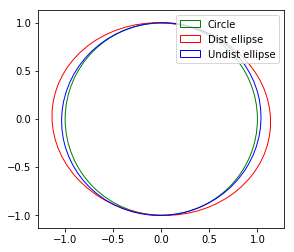

In [8]:
labels = ['Circle','Dist ellipse', 'Undist ellipse']
#Circle, R = 1 centered on the origin.
circle = plt.Circle((0,0),1,fc = 'none',ec="g")
plt.gca().add_patch(circle)
plt.axis('scaled')

#Right Dist ball
dist_scaled_a = 2*right_dist_ball[1][0]/right_dist_ball[1][0]
dist_scaled_b = 2*right_dist_ball[1][1]/right_dist_ball[1][0]
dist_ellipse = Ellipse((0,0),dist_scaled_a,dist_scaled_b,right_dist_ball[2],edgecolor ='r',fc = 'none')
plt.gca().add_patch(dist_ellipse)
plt.axis('scaled')

#Right Undist ball
undist_scaled_a = 2*right_undist_ball[1][0]/right_undist_ball[1][0]
undist_scaled_b = 2*right_undist_ball[1][1]/right_undist_ball[1][0]
undist_ellipse = Ellipse((0,0),undist_scaled_a,undist_scaled_b,right_undist_ball[2],edgecolor ='b',fc = 'none')
plt.gca().add_patch(undist_ellipse)
plt.legend(labels)

plt.show()

#### Review of information from Ellipses associated with the RIGHT ball

The comparison of the width and height values of the right ball shows the improvement thanks to the undistorting process
#### Right Ball Comparison
| | Distorted  | Undistorted    |
|---:|:-------------|:-----------|
| <b>Width</b> | 221.83  |    211.07   |
| <b>Height</b> | 252.60  |  219.33   |
| <b>Correlation</b> | 0.8782  |  0.9623  |

In the case of the right ball, there is a **8.41%** improvement after the undistortion process.

# Last Big Note

So the correlation values here are unfortunately affected by how well the balls can be segmented from the images, thus the correlation values are affected by the distortion correction and the segmentation process. I've tried to segment them as best I can and the results are probably still influenced by the segmentation process. 

However, I think these results definetly show the improvement from undistorting the images and the fact that the **width** and **height** for the left and right ball after distortion are quite close is very promising.

| | Left  | Right    |
|---:|:-------------|:-----------|
| <b>Width</b> | 211.01  |    211.07   |
| <b>Height</b> | 218.72  |  219.33   |
| <b>Correlation</b> | 0.9647  |  0.9623  |

## Raw Ellipse Data

### Format:
Correlation value

[(Xcenter, Ycenter),
(Width, Height),
(Angle)]

### Left Ball Ellipses:

In [13]:
print(left_dist_ball[1][0]/left_dist_ball[1][1])
left_dist_ball

0.9390201169009574


((2560.507568359375, 624.2418212890625),
 (212.38082885742188, 226.17282104492188),
 46.39094543457031)

In [9]:
print(left_undist_ball[1][0]/left_undist_ball[1][1])
left_undist_ball

0.9647485939202661


((2553.392822265625, 629.523681640625),
 (211.011962890625, 218.72222900390625),
 46.07051086425781)

### Right Ball Ellipses

In [14]:
print(right_dist_ball[1][0]/right_dist_ball[1][1])
right_dist_ball

0.8782149847633115


((3487.913330078125, 814.4769897460938),
 (221.83346557617188, 252.59585571289062),
 83.39884948730469)

In [10]:
print(right_undist_ball[1][0]/right_undist_ball[1][1])
right_undist_ball

0.9623116588215814


((3419.77001953125, 830.548095703125),
 (211.06629943847656, 219.33258056640625),
 103.85359191894531)